In [ ]:
# mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# membaca data a
df = pd.read_csv("https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/Leviosa.csv", delimiter=';')
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,01/01/2010,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,02/01/2010,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,03/01/2010,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,04/01/2010,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,05/01/2010,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...
4378,27/12/2021,52.0,61.0,15.0,20.0,15.0,71.0,PM25,SEDANG
4379,28/12/2021,51.0,53.0,15.0,18.0,13.0,65.0,PM25,SEDANG
4380,29/12/2021,31.0,54.0,10.0,24.0,11.0,54.0,SO2,SEDANG
4381,30/12/2021,55.0,53.0,16.0,23.0,14.0,71.0,PM25,SEDANG


In [ ]:
# melihat informasi dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4171 non-null   float64
 2   so2       4208 non-null   float64
 3   co        4233 non-null   float64
 4   o3        4180 non-null   float64
 5   no2       4190 non-null   float64
 6   max       4374 non-null   float64
 7   critical  4273 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
# melihat banyak baris dan kolom
df.shape

(4383, 9)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

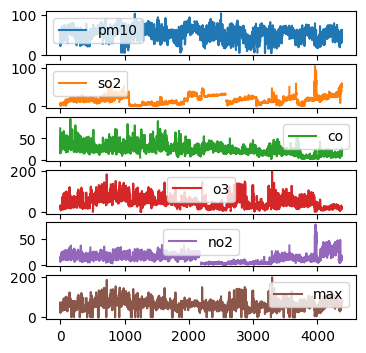

In [ ]:
# melihat persebaran data time series
df.plot(subplots=True, figsize=(4, 4))


In [ ]:
#membuat fungsi untuk visualisasi data

def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
# time_step = df['tanggal']
# series = df['pm10']

# time = np.array(time_step)
# series = np.array(series)

# plot_series(time, series, xlabel='date', ylabel='Monthly Mean Total Sunspot Number')

In [ ]:
# melihat null value
df.isnull().sum()

tanggal       0
pm10        212
so2         175
co          150
o3          203
no2         193
max           9
critical    110
categori      0
dtype: int64

In [ ]:
# membuat dataframe yang lain
data = pd.DataFrame(df)
data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,01/01/2010,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,02/01/2010,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,03/01/2010,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,04/01/2010,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,05/01/2010,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...
4378,27/12/2021,52.0,61.0,15.0,20.0,15.0,71.0,PM25,SEDANG
4379,28/12/2021,51.0,53.0,15.0,18.0,13.0,65.0,PM25,SEDANG
4380,29/12/2021,31.0,54.0,10.0,24.0,11.0,54.0,SO2,SEDANG
4381,30/12/2021,55.0,53.0,16.0,23.0,14.0,71.0,PM25,SEDANG


In [ ]:
# mengisi nilai null dari setiap kolom

data["pm10"] = data["pm10"].interpolate(method='linear', limit_direction='forward', axis=0)
data["so2"] = data["so2"].interpolate(method='linear', limit_direction='forward', axis=0)
data["co"] = data["co"].interpolate(method='linear', limit_direction='forward', axis=0)
data["o3"] = data["o3"].interpolate(method='linear', limit_direction='forward', axis=0)
data["no2"] = data["no2"].interpolate(method='linear', limit_direction='forward', axis=0)

In [ ]:
data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,01/01/2010,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,02/01/2010,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,03/01/2010,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,04/01/2010,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,05/01/2010,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...
4378,27/12/2021,52.0,61.0,15.0,20.0,15.0,71.0,PM25,SEDANG
4379,28/12/2021,51.0,53.0,15.0,18.0,13.0,65.0,PM25,SEDANG
4380,29/12/2021,31.0,54.0,10.0,24.0,11.0,54.0,SO2,SEDANG
4381,30/12/2021,55.0,53.0,16.0,23.0,14.0,71.0,PM25,SEDANG


In [ ]:
data.isnull().sum()

tanggal       0
pm10          0
so2           0
co            0
o3            0
no2           0
max           9
critical    110
categori      0
dtype: int64

In [ ]:
# melihat data-data yang berkategori baik
data_baik = data[data['categori']=='BAIK'].sort_values(by='max',ascending=True).reset_index()
data_baik

,index,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,3958,02/11/2020,23.0,27.0,15.000000,3.0,32.000000,5.0,O3,BAIK
1,3986,30/11/2020,18.0,21.0,16.000000,4.0,27.000000,5.0,O3,BAIK
2,3089,17/06/2018,53.0,6.6,8.000000,26.6,2.000000,8.0,CO,BAIK
3,1866,10/02/2015,55.0,9.0,21.333333,13.0,15.666667,13.0,O3,BAIK
4,3183,19/09/2018,6.0,12.0,16.000000,14.0,4.000000,16.0,CO,BAIK
...,...,...,...,...,...,...,...,...,...,...
1049,2378,06/07/2016,50.0,28.0,37.000000,24.0,3.000000,50.0,PM10,BAIK
1050,3792,20/05/2020,50.0,12.0,10.000000,34.0,8.000000,50.0,PM10,BAIK
1051,3779,07/05/2020,50.0,4.0,3.000000,48.0,9.000000,50.0,PM10,BAIK
1052,3022,11/04/2018,50.0,22.0,20.000000,25.0,2.000000,50.0,PM10,BAIK


In [ ]:
# melihat data-data yang berkategori sedang
data_sedang = data[data['categori']=='SEDANG'].sort_values(by='max',ascending=True).reset_index()
data_sedang

,index,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,3985,29/11/2020,37.0,56.0,17.0,7.0,24.0,9.0,PM25,SEDANG
1,3976,20/11/2020,53.0,68.0,20.0,5.0,34.0,10.0,PM25,SEDANG
2,3959,03/11/2020,43.0,64.0,19.0,6.0,53.0,10.0,PM25,SEDANG
3,3972,16/11/2020,51.0,70.0,20.0,5.0,42.0,11.0,PM25,SEDANG
4,3957,01/11/2020,49.0,67.0,18.0,10.0,40.0,11.0,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...
3060,820,31/03/2012,51.0,28.0,29.0,100.0,31.0,100.0,O3,SEDANG
3061,683,15/11/2011,54.0,22.0,27.0,100.0,18.0,100.0,O3,SEDANG
3062,627,20/09/2011,64.0,16.0,31.0,100.0,23.0,100.0,O3,SEDANG
3063,1270,24/06/2013,67.0,5.0,36.0,100.0,18.0,100.0,O3,SEDANG


In [ ]:
# melihat data-data yang berkategori buruk
data_buruk = data[data['categori']=='TIDAK SEHAT'].sort_values(by='max',ascending=True).reset_index()
data_buruk

,index,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,3962,06/11/2020,79.0,106.0,23.0,13.0,49.000000,20.0,PM25,TIDAK SEHAT
1,2870,10/11/2017,50.0,19.0,28.0,101.0,5.000000,101.0,O3,TIDAK SEHAT
2,4207,09/07/2021,70.0,33.0,9.0,28.0,25.000000,101.0,PM25,TIDAK SEHAT
3,985,12/09/2012,73.0,31.0,49.0,101.0,20.000000,101.0,O3,TIDAK SEHAT
4,3303,17/01/2019,56.0,22.0,23.0,101.0,7.285714,101.0,O3,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...
149,2207,17/01/2016,58.0,42.0,19.0,149.0,4.000000,149.0,O3,TIDAK SEHAT
150,2871,11/11/2017,56.0,20.0,24.0,150.0,5.000000,150.0,O3,TIDAK SEHAT
151,863,13/05/2012,75.0,40.0,27.0,153.0,15.000000,153.0,O3,TIDAK SEHAT
152,724,26/12/2011,55.0,16.5,33.0,185.0,10.000000,185.0,O3,TIDAK SEHAT


In [ ]:
data_null = data[data['categori']=='TIDAK ADA DATA'].reset_index()
data_null

,index,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,175,25/06/2010,58.666667,18.333333,30.000000,43.0,22.333333,0.0,NaN,TIDAK ADA DATA
1,215,04/08/2010,68.500000,14.500000,33.333333,52.0,21.500000,0.0,NaN,TIDAK ADA DATA
2,304,01/11/2010,36.000000,13.000000,24.000000,30.5,11.000000,0.0,NaN,TIDAK ADA DATA
3,419,24/02/2011,44.333333,14.666667,25.333333,37.0,11.333333,0.0,NaN,TIDAK ADA DATA
4,420,25/02/2011,41.666667,14.333333,24.666667,33.0,11.666667,0.0,NaN,TIDAK ADA DATA
...,...,...,...,...,...,...,...,...,...,...
105,3621,01/12/2019,54.500000,19.500000,16.000000,60.5,11.500000,0.0,NaN,TIDAK ADA DATA
106,3631,11/12/2019,57.666667,21.500000,19.333333,49.0,13.000000,0.0,NaN,TIDAK ADA DATA
107,3642,22/12/2019,55.500000,22.500000,24.000000,61.0,14.000000,0.0,NaN,TIDAK ADA DATA
108,3648,28/12/2019,52.000000,26.000000,23.333333,43.0,10.333333,0.0,NaN,TIDAK ADA DATA


In [ ]:
data.isnull().sum()

tanggal       0
pm10          0
so2           0
co            0
o3            0
no2           0
max           9
critical    110
categori      0
dtype: int64

In [ ]:
data[data['categori'] == 'TIDAK ADA DATA']

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
175,25/06/2010,58.666667,18.333333,30.000000,43.0,22.333333,0.0,NaN,TIDAK ADA DATA
215,04/08/2010,68.500000,14.500000,33.333333,52.0,21.500000,0.0,NaN,TIDAK ADA DATA
304,01/11/2010,36.000000,13.000000,24.000000,30.5,11.000000,0.0,NaN,TIDAK ADA DATA
419,24/02/2011,44.333333,14.666667,25.333333,37.0,11.333333,0.0,NaN,TIDAK ADA DATA
420,25/02/2011,41.666667,14.333333,24.666667,33.0,11.666667,0.0,NaN,TIDAK ADA DATA
...,...,...,...,...,...,...,...,...,...
3621,01/12/2019,54.500000,19.500000,16.000000,60.5,11.500000,0.0,NaN,TIDAK ADA DATA
3631,11/12/2019,57.666667,21.500000,19.333333,49.0,13.000000,0.0,NaN,TIDAK ADA DATA
3642,22/12/2019,55.500000,22.500000,24.000000,61.0,14.000000,0.0,NaN,TIDAK ADA DATA
3648,28/12/2019,52.000000,26.000000,23.333333,43.0,10.333333,0.0,NaN,TIDAK ADA DATA


In [ ]:
data = data.drop(data[data['categori'] == 'TIDAK ADA DATA'].index)
data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,01/01/2010,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,02/01/2010,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,03/01/2010,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,04/01/2010,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,05/01/2010,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...
4378,27/12/2021,52.0,61.0,15.0,20.0,15.0,71.0,PM25,SEDANG
4379,28/12/2021,51.0,53.0,15.0,18.0,13.0,65.0,PM25,SEDANG
4380,29/12/2021,31.0,54.0,10.0,24.0,11.0,54.0,SO2,SEDANG
4381,30/12/2021,55.0,53.0,16.0,23.0,14.0,71.0,PM25,SEDANG


In [ ]:
fill_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/fill_data.csv')
fill_data = fill_data.drop(columns=['index','Unnamed: 0'])
fill_data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,25/06/2010,58.666667,18.333333,30.0,43.0,22.333333,58.666667,pm10,TIDAK ADA DATA
1,24/06/2016,56.000000,28.500000,33.5,28.5,4.000000,56.000000,pm10,TIDAK ADA DATA
2,28/03/2016,51.000000,26.000000,24.5,21.0,2.000000,51.000000,pm10,TIDAK ADA DATA
3,9/3/2015,51.000000,8.500000,16.0,46.0,14.500000,51.000000,pm10,TIDAK ADA DATA
4,28/01/2015,54.400000,6.600000,29.4,36.2,15.400000,54.400000,pm10,TIDAK ADA DATA
...,...,...,...,...,...,...,...,...,...
105,19/06/2018,47.000000,5.800000,8.4,21.8,2.000000,47.000000,pm10,TIDAK ADA DATA
106,20/06/2018,44.000000,5.400000,8.6,19.4,2.000000,44.000000,pm10,TIDAK ADA DATA
107,7/7/2018,48.000000,7.333333,15.0,30.0,5.190476,48.000000,pm10,TIDAK ADA DATA
108,8/7/2018,41.000000,6.666667,15.0,40.0,5.380952,41.000000,pm10,TIDAK ADA DATA


In [ ]:
data_clean = pd.concat([data, fill_data])
data_clean.isnull().sum()

tanggal     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [ ]:
data_clean.shape

(4383, 9)

In [ ]:
data_clean

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,01/01/2010,60.0,4.000000,73.0,27.0,14.000000,73.0,CO,SEDANG
1,02/01/2010,32.0,2.000000,16.0,33.0,9.000000,33.0,O3,BAIK
2,03/01/2010,27.0,2.000000,19.0,20.0,9.000000,27.0,PM10,BAIK
3,04/01/2010,22.0,2.000000,16.0,15.0,6.000000,22.0,PM10,BAIK
4,05/01/2010,25.0,2.000000,17.0,15.0,8.000000,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...
105,19/06/2018,47.0,5.800000,8.4,21.8,2.000000,47.0,pm10,TIDAK ADA DATA
106,20/06/2018,44.0,5.400000,8.6,19.4,2.000000,44.0,pm10,TIDAK ADA DATA
107,7/7/2018,48.0,7.333333,15.0,30.0,5.190476,48.0,pm10,TIDAK ADA DATA
108,8/7/2018,41.0,6.666667,15.0,40.0,5.380952,41.0,pm10,TIDAK ADA DATA


In [ ]:
data_clean["tanggal"] = pd.to_datetime(data_clean["tanggal"])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 109
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 342.4+ KB


<ipython-input-28-08425f513849>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_clean["tanggal"] = pd.to_datetime(data_clean["tanggal"])


In [ ]:
data_clean = data_clean.sort_values(by='tanggal',ascending=True).reset_index()
data_clean

,index,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,0,2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
1,31,2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2,59,2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
3,90,2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
4,120,2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...,...
4378,4378,2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
4379,4379,2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
4380,4380,2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG
4381,4381,2021-12-30,55.0,53.0,16.0,23.00,14.0,71.0,PM25,SEDANG


In [ ]:
data_clean = data_clean.drop(columns='index')
data_clean

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
1,2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2,2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
3,2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
4,2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
4379,2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
4380,2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG
4381,2021-12-30,55.0,53.0,16.0,23.00,14.0,71.0,PM25,SEDANG


In [ ]:
from google.colab import files
data_clean.to_csv('clean.csv', encoding = 'utf-8-sig')
files.download('clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_clean.describe()

,pm10,so2,co,o3,no2,max
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,52.263404,17.913301,24.891969,49.337554,13.946498,61.992529
std,14.508289,10.716175,11.116814,25.536358,8.874350,20.270700
min,4.000000,1.000000,3.000000,3.000000,1.000000,5.000000
25%,44.000000,10.000000,18.000000,29.000000,6.755000,50.000000
50%,54.000000,17.000000,24.000000,46.000000,13.800000,61.000000
75%,62.000000,25.000000,31.000000,66.000000,19.000000,73.000000
max,104.000000,106.000000,95.000000,198.000000,79.000000,198.000000


In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


In [ ]:
outliers = find_outliers_IQR(data_clean["pm10"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 60
max outlier value: 104.0
min outlier value: 4.0


In [ ]:
import plotly.express as px

fig = px.box(data_clean, x='pm10')

fig.show()

In [ ]:
data_clean

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
1,2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2,2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
3,2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
4,2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
4379,2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
4380,2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG
4381,2021-12-30,55.0,53.0,16.0,23.00,14.0,71.0,PM25,SEDANG


In [ ]:
data_clean[data_clean['categori'] == 'TIDAK ADA DATA']

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
10,2010-01-11,36.000000,13.000000,24.000000,30.5,11.000000,36.000000,pm10,TIDAK ADA DATA
97,2010-04-08,68.500000,14.500000,33.333333,52.0,21.500000,68.500000,pm10,TIDAK ADA DATA
175,2010-06-25,58.666667,18.333333,30.000000,43.0,22.333333,58.666667,pm10,TIDAK ADA DATA
419,2011-02-24,44.333333,14.666667,25.333333,37.0,11.333333,44.333333,pm10,TIDAK ADA DATA
420,2011-02-25,41.666667,14.333333,24.666667,33.0,11.666667,41.666667,pm10,TIDAK ADA DATA
...,...,...,...,...,...,...,...,...,...
3617,2019-11-27,65.500000,22.500000,21.000000,57.0,14.500000,65.500000,pm10,TIDAK ADA DATA
3627,2019-12-07,60.500000,23.000000,19.000000,68.5,14.000000,68.500000,o3,TIDAK ADA DATA
3642,2019-12-22,55.500000,22.500000,24.000000,61.0,14.000000,61.000000,o3,TIDAK ADA DATA
3648,2019-12-28,52.000000,26.000000,23.333333,43.0,10.333333,52.000000,pm10,TIDAK ADA DATA


## Modelling klasifikasi

In [ ]:
data_klasifikasi = data_clean.drop(data_clean[data_clean['categori'] == 'TIDAK ADA DATA'].index)
data_klasifikasi

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
1,2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2,2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
3,2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
4,2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
4379,2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
4380,2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG
4381,2021-12-30,55.0,53.0,16.0,23.00,14.0,71.0,PM25,SEDANG


In [ ]:
x = data_klasifikasi[['pm10','so2','co','o3','no2','max']]
y = data_klasifikasi['categori'].astype('category')

In [ ]:
x

,pm10,so2,co,o3,no2,max
0,60.0,4.0,73.0,27.00,14.0,73.0
1,41.0,7.0,30.0,17.00,13.0,41.0
2,60.0,5.0,39.0,44.00,19.0,60.0
3,59.0,5.0,46.0,72.75,21.0,59.0
4,60.0,15.5,24.0,28.00,10.0,60.0
...,...,...,...,...,...,...
4378,52.0,61.0,15.0,20.00,15.0,71.0
4379,51.0,53.0,15.0,18.00,13.0,65.0
4380,31.0,54.0,10.0,24.00,11.0,54.0
4381,55.0,53.0,16.0,23.00,14.0,71.0


In [ ]:
y

0       SEDANG
1         BAIK
2       SEDANG
3       SEDANG
4       SEDANG
         ...  
4378    SEDANG
4379    SEDANG
4380    SEDANG
4381    SEDANG
4382    SEDANG
Name: categori, Length: 4273, dtype: category
Categories (3, object): ['BAIK', 'SEDANG', 'TIDAK SEHAT']

In [ ]:
#Split Training and Testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [ ]:
DT_model = DecisionTreeClassifier()

#Training Model
DT_model = DT_model.fit(x_train,y_train)

#prediksi
ypred_dt = DT_model.predict(x_test)

In [ ]:
#Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix



In [ ]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       316
      SEDANG       1.00      1.00      1.00       921
 TIDAK SEHAT       1.00      0.98      0.99        45

    accuracy                           1.00      1282
   macro avg       1.00      0.99      0.99      1282
weighted avg       1.00      1.00      1.00      1282



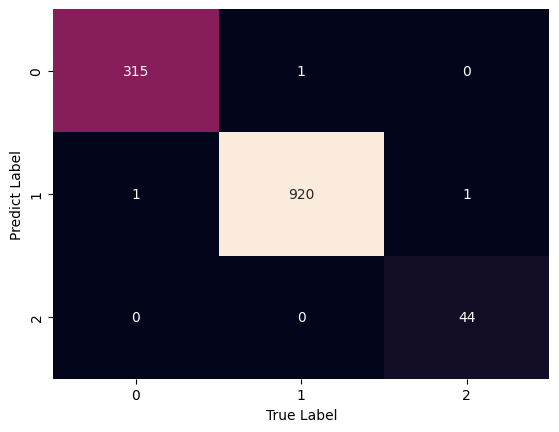

In [ ]:
# Memvisualisasikan Confusion Matrix
import seaborn as sns
mat = confusion_matrix(y_test,ypred_dt)
sns.heatmap(mat.T,annot=True, fmt='d',cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')
plt.show()

<Axes: >

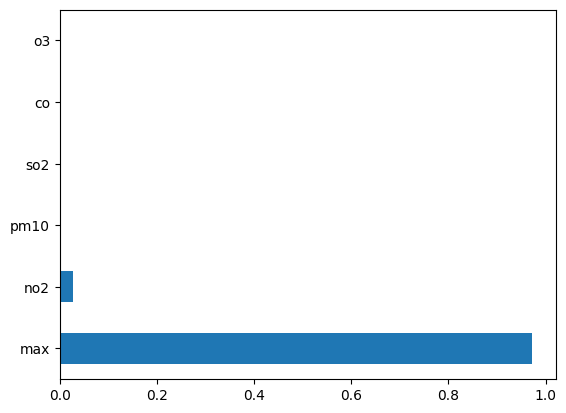

In [ ]:
#Significant faktor dari model

feat_importance = pd.Series(DT_model.feature_importances_, index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')


# Pemodelan Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
RF_model = RandomForestClassifier(n_estimators=200, max_depth=6)

#Training Model
RF_model = RF_model.fit(x_train,y_train)

#prediksi
ypred_rf = RF_model.predict(x_test)


In [ ]:
# save model
from joblib import dump

# Save the trained model to a file
model_filename = 'random_forest_model.joblib'
dump(RF_model, model_filename)

['random_forest_model.joblib']

## Evaluasi Model Random Forest

In [ ]:
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       316
      SEDANG       1.00      1.00      1.00       921
 TIDAK SEHAT       1.00      0.98      0.99        45

    accuracy                           1.00      1282
   macro avg       1.00      0.99      1.00      1282
weighted avg       1.00      1.00      1.00      1282



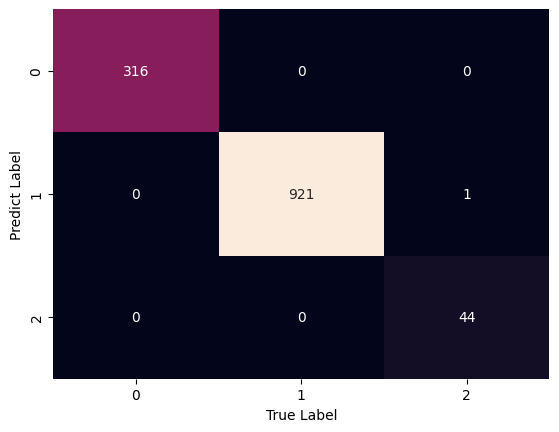

In [ ]:
# Memvisualisasikan Confusion Matrix

mat = confusion_matrix(y_test,ypred_rf)
sns.heatmap(mat.T,annot=True, fmt='d',cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')
plt.show()

<Axes: >

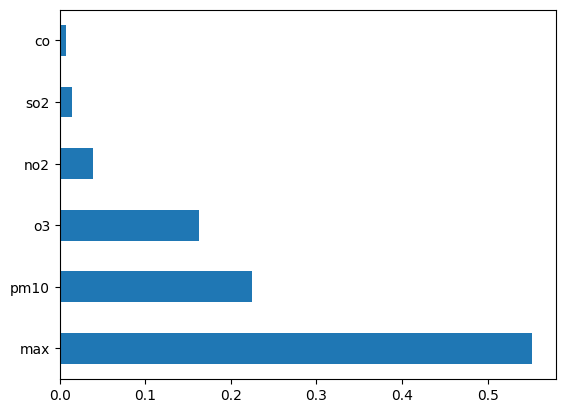

In [ ]:
feat_importance = pd.Series(RF_model.feature_importances_, index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')


In [ ]:
data_test = data_clean[data_clean['categori'] == 'TIDAK ADA DATA']
data_test

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
10,2010-01-11,36.000000,13.000000,24.000000,30.5,11.000000,36.000000,pm10,TIDAK ADA DATA
97,2010-04-08,68.500000,14.500000,33.333333,52.0,21.500000,68.500000,pm10,TIDAK ADA DATA
175,2010-06-25,58.666667,18.333333,30.000000,43.0,22.333333,58.666667,pm10,TIDAK ADA DATA
419,2011-02-24,44.333333,14.666667,25.333333,37.0,11.333333,44.333333,pm10,TIDAK ADA DATA
420,2011-02-25,41.666667,14.333333,24.666667,33.0,11.666667,41.666667,pm10,TIDAK ADA DATA
...,...,...,...,...,...,...,...,...,...
3617,2019-11-27,65.500000,22.500000,21.000000,57.0,14.500000,65.500000,pm10,TIDAK ADA DATA
3627,2019-12-07,60.500000,23.000000,19.000000,68.5,14.000000,68.500000,o3,TIDAK ADA DATA
3642,2019-12-22,55.500000,22.500000,24.000000,61.0,14.000000,61.000000,o3,TIDAK ADA DATA
3648,2019-12-28,52.000000,26.000000,23.333333,43.0,10.333333,52.000000,pm10,TIDAK ADA DATA


In [ ]:
data_chunk = data_test.drop(columns='categori').reset_index(drop=True)
data_chunk

,tanggal,pm10,so2,co,o3,no2,max,critical
0,2010-01-11,36.000000,13.000000,24.000000,30.5,11.000000,36.000000,pm10
1,2010-04-08,68.500000,14.500000,33.333333,52.0,21.500000,68.500000,pm10
2,2010-06-25,58.666667,18.333333,30.000000,43.0,22.333333,58.666667,pm10
3,2011-02-24,44.333333,14.666667,25.333333,37.0,11.333333,44.333333,pm10
4,2011-02-25,41.666667,14.333333,24.666667,33.0,11.666667,41.666667,pm10
...,...,...,...,...,...,...,...,...
105,2019-11-27,65.500000,22.500000,21.000000,57.0,14.500000,65.500000,pm10
106,2019-12-07,60.500000,23.000000,19.000000,68.5,14.000000,68.500000,o3
107,2019-12-22,55.500000,22.500000,24.000000,61.0,14.000000,61.000000,o3
108,2019-12-28,52.000000,26.000000,23.333333,43.0,10.333333,52.000000,pm10


In [ ]:
# fill_data.sort_values(by='tanggal',ascending=True).reset_index(inplace = True,drop=True)
# fill_data

In [ ]:
fill_data_new = data_test.drop(columns=['tanggal','critical','categori'])
fill_data_new

,pm10,so2,co,o3,no2,max
10,36.000000,13.000000,24.000000,30.5,11.000000,36.000000
97,68.500000,14.500000,33.333333,52.0,21.500000,68.500000
175,58.666667,18.333333,30.000000,43.0,22.333333,58.666667
419,44.333333,14.666667,25.333333,37.0,11.333333,44.333333
420,41.666667,14.333333,24.666667,33.0,11.666667,41.666667
...,...,...,...,...,...,...
3617,65.500000,22.500000,21.000000,57.0,14.500000,65.500000
3627,60.500000,23.000000,19.000000,68.5,14.000000,68.500000
3642,55.500000,22.500000,24.000000,61.0,14.000000,61.000000
3648,52.000000,26.000000,23.333333,43.0,10.333333,52.000000


In [ ]:
ypred = RF_model.predict(fill_data_new)
ypred

array(['BAIK', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'BAIK', 'SEDANG', 'BAIK', 'SEDANG', 'BAIK', 'SEDANG', 'BAIK',
       'SEDANG', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK',
       'SEDANG', 'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK',
       'BAIK', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'BAIK',
       'BAIK', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK',
       'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'BAIK',
       'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK',
       '

In [ ]:
fill_data_predictor = pd.DataFrame(ypred, columns=['categori'])
fill_data_predictor

,categori
0,BAIK
1,SEDANG
2,SEDANG
3,BAIK
4,BAIK
...,...
105,SEDANG
106,SEDANG
107,SEDANG
108,SEDANG


In [ ]:
filled_data_ready = pd.concat([data_chunk,fill_data_predictor],axis=1)
filled_data_ready


,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-11,36.000000,13.000000,24.000000,30.5,11.000000,36.000000,pm10,BAIK
1,2010-04-08,68.500000,14.500000,33.333333,52.0,21.500000,68.500000,pm10,SEDANG
2,2010-06-25,58.666667,18.333333,30.000000,43.0,22.333333,58.666667,pm10,SEDANG
3,2011-02-24,44.333333,14.666667,25.333333,37.0,11.333333,44.333333,pm10,BAIK
4,2011-02-25,41.666667,14.333333,24.666667,33.0,11.666667,41.666667,pm10,BAIK
...,...,...,...,...,...,...,...,...,...
105,2019-11-27,65.500000,22.500000,21.000000,57.0,14.500000,65.500000,pm10,SEDANG
106,2019-12-07,60.500000,23.000000,19.000000,68.5,14.000000,68.500000,o3,SEDANG
107,2019-12-22,55.500000,22.500000,24.000000,61.0,14.000000,61.000000,o3,SEDANG
108,2019-12-28,52.000000,26.000000,23.333333,43.0,10.333333,52.000000,pm10,SEDANG


In [ ]:
ready_data = pd.concat([data_klasifikasi,filled_data_ready])
ready_data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,60.0,4.0,73.000000,27.00,14.000000,73.0,CO,SEDANG
1,2010-01-02,41.0,7.0,30.000000,17.00,13.000000,41.0,PM10,BAIK
2,2010-01-03,60.0,5.0,39.000000,44.00,19.000000,60.0,PM10,SEDANG
3,2010-01-04,59.0,5.0,46.000000,72.75,21.000000,59.0,PM10,SEDANG
4,2010-01-05,60.0,15.5,24.000000,28.00,10.000000,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...
105,2019-11-27,65.5,22.5,21.000000,57.00,14.500000,65.5,pm10,SEDANG
106,2019-12-07,60.5,23.0,19.000000,68.50,14.000000,68.5,o3,SEDANG
107,2019-12-22,55.5,22.5,24.000000,61.00,14.000000,61.0,o3,SEDANG
108,2019-12-28,52.0,26.0,23.333333,43.00,10.333333,52.0,pm10,SEDANG


In [ ]:
ready_data = ready_data.sort_values(by='tanggal',ascending=True)

In [ ]:
ready_data.reset_index(inplace=True,drop=True)

In [ ]:
ready_data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
1,2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2,2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
3,2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
4,2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
4379,2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
4380,2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG
4381,2021-12-30,55.0,53.0,16.0,23.00,14.0,71.0,PM25,SEDANG


# TIME SERIES FORCASTING

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

,tanggal,pm10,so2,co,o3,no2
0,2010-01-01,60.0,4.0,73.0,27.00,14.0
1,2010-01-02,41.0,7.0,30.0,17.00,13.0
2,2010-01-03,60.0,5.0,39.0,44.00,19.0
3,2010-01-04,59.0,5.0,46.0,72.75,21.0
4,2010-01-05,60.0,15.5,24.0,28.00,10.0
...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.00,15.0
4379,2021-12-28,51.0,53.0,15.0,18.00,13.0
4380,2021-12-29,31.0,54.0,10.0,24.00,11.0
4381,2021-12-30,55.0,53.0,16.0,23.00,14.0


In [ ]:
ordered_data_timeseries = data_timeseries.set_index('tanggal')

In [ ]:
# split data training dan testing
train=ordered_data_timeseries.iloc[:round(len(ordered_data_timeseries)*0.8)]
test=ordered_data_timeseries.iloc[round(len(ordered_data_timeseries)*0.8):]

In [ ]:
train

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,60.0,4.0,73.0,27.00,14.0
2010-01-02,41.0,7.0,30.0,17.00,13.0
2010-01-03,60.0,5.0,39.0,44.00,19.0
2010-01-04,59.0,5.0,46.0,72.75,21.0
2010-01-05,60.0,15.5,24.0,28.00,10.0
...,...,...,...,...,...
2019-08-03,56.0,18.0,41.0,33.00,27.0
2019-08-04,47.0,7.0,24.0,84.00,17.0
2019-08-05,55.0,4.0,30.0,61.00,21.0


In [ ]:
test

,pm10,so2,co,o3,no2
tanggal,,,,,
2019-08-08,63.0,22.0,24.0,73.0,21.0
2019-08-09,52.0,21.0,14.0,59.0,10.0
2019-08-10,57.4,25.0,19.0,52.0,13.0
2019-08-11,72.0,24.0,20.0,86.0,19.0
2019-08-12,51.0,21.0,22.0,57.0,10.0
...,...,...,...,...,...
2021-12-27,52.0,61.0,15.0,20.0,15.0
2021-12-28,51.0,53.0,15.0,18.0,13.0
2021-12-29,31.0,54.0,10.0,24.0,11.0


In [ ]:
print(train.shape)
print(test.shape)

(3506, 5)
(877, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['pm10'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 365))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
#membuat prediksi dgn model
forecast_step = 877  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values)
print(confidence_intervals)

In [ ]:
result_sarimax.summary()

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

In [ ]:
predicted_val.describe()

In [ ]:
tess = data_timeseries.iloc[round(len(data_timeseries)*0.8):]
tess

In [ ]:
predicted_val1 = pd.concat([tess[['tanggal','pm10']], predicted_val],axis=1)
predicted_val1

In [ ]:
predicted_val1 = predicted_val1.set_index('tanggal')
predicted_val1

In [ ]:
predicted_val1 = predicted_val1.drop(columns = 'pm10')
predicted_val1

In [ ]:
test

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
test['pm10'].plot(legend=True)

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
test['pm10'].plot(legend=True)

#Evaluasi Seasonal Arima

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
mean_absolute_percentage_error(test['pm10'], predicted_val1['predicted_mean'])

# predictions


#SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
!pip install yfinance

In [ ]:
# Proses data menjadi format yang sesuai
ordered_data_timeseries['tanggal'] = ordered_data_timeseries.index
ordered_data_timeseries = ordered_data_timeseries.reset_index(drop=True)
ordered_data_timeseries = ordered_data_timeseries[['tanggal', 'pm10']]
ordered_data_timeseries.columns = ['ds', 'y']

In [ ]:
# Split data menjadi train dan test set
train_size = int(len(ordered_data_timeseries) * 0.8)
train, test = ordered_data_timeseries[:train_size], ordered_data_timeseries[train_size:]

# SVR Model
svr = SVR(kernel='rbf', C=1000, gamma=0.1)
svr.fit(train[['ds']].values.reshape(-1, 1), train['y'])

# Prediksi dengan SVR
predictions_svr = svr.predict(test[['ds']])

# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], predictions_svr, label='SVR Predictions')
plt.legend()
plt.show()

#Evaluasi SVR

In [ ]:
# Hitung prediksi SVR
predictions_svr = svr.predict(test[['ds']])

# Hitung RMSE SVR
rmse_svr = np.sqrt(mean_squared_error(test['y'], predictions_svr))
print("RMSE SVR:", rmse_svr)

#LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt

In [ ]:
# Menampilkan daftar kolom yang ada dalam DataFrame
print(ordered_data_timeseries.columns)

# Memastikan kolom 'tanggal' dan 'pm10' ada dalam DataFrame
if 'tanggal' in ordered_data_timeseries.columns and 'pm10' in ordered_data_timeseries.columns:
    # Pilih kolom yang berisi data waktu dan kualitas udara
    df_pm = ordered_data_timeseries[['tanggal', 'pm10']]

    # Konversi kolom tanggal ke format datetime
    df_pm['tanggal'] = pd.to_datetime(df_pm['tanggal'])

    # Lanjutkan dengan langkah-langkah lainnya
    # ...
else:
    print("Kolom 'tanggal' dan/atau 'pm10' tidak ada dalam DataFrame.")


In [ ]:
# Pilih kolom yang berisi data waktu dan kualitas udara
df_pm = ordered_data_timeseries[['ds', 'y']]

# Konversi kolom tanggal ke format datetime
df_pm['ds'] = pd.to_datetime(ordered_data_timeseries['ds'])

# Set tanggal sebagai index
df_pm.set_index('ds', inplace=True)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_pm['y'].values.reshape(-1, 1))

# Fungsi untuk membuat dataset sesuai format LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Menentukan time step
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape data menjadi bentuk yang sesuai untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X, y, epochs=100, batch_size=64, verbose=1)

# Membuat dataset untuk 3 tahun ke depan
future_steps = 36
future_data = scaled_data[-time_step:].reshape(1, -1, 1)

# Melakukan prediksi untuk 3 tahun ke depan
future_predictions = []
for i in range(future_steps):
    prediction = model.predict(future_data)
    future_predictions.append(prediction[0, 0])
    future_data = np.append(future_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Mengembalikan data ke skala asli
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Menampilkan hasil prediksi
print(future_predictions)

# Visualisasi hasil
# Ambil data asli dan hasil prediksi ke dalam DataFrame
actual_data = df_pm['y'].values[-future_steps:]
result_df = pd.DataFrame({'Actual': actual_data, 'Predicted': future_predictions.flatten()}, index=df.index[-future_steps:])

# Plot data asli dan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(result_df.index, result_df['Actual'], label='Actual Data', marker='o')
plt.plot(result_df.index, result_df['Predicted'], label='Predicted Data', marker='o')
plt.title('Actual vs Predicted Air Quality')
plt.xlabel('Time')
plt.ylabel('Air Quality')
plt.legend()
plt.show()

#Evaluasi LSTM

In [ ]:
# Ambil data asli untuk periode waktu yang sesuai dengan prediksi
actual_data = df_pm['y'].values[-future_steps:]

# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(actual_data, future_predictions)

# Hitung RMSE (Root Mean Squared Error)
rmse = sqrt(mse)

print(f"RMSE: {rmse}")

## Neural network


In [ ]:
import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt



def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)


def solution_C5():

    series = data_timeseries['pm10']

    # Normalization Function. DO NOT CHANGE THIS CODE
    min=np.min(series)
    max=np.max(series)
    series -= min
    series /= max
    # time=np.array(time_step)
    time = data_timeseries['tanggal']

    # DO NOT CHANGE THIS CODE
    split_time=2500

    time_train = time[:split_time]  # YOUR CODE HERE
    x_train = series[:split_time]  # YOUR CODE HERE
    time_valid = time[split_time:]  # YOUR CODE HERE
    x_valid = series[split_time:]  # YOUR CODE HERE

    # DO NOT CHANGE THIS CODE
    window_size=64
    batch_size=256
    shuffle_buffer_size=1000

    train_set=windowed_dataset(
        x_train, window_size, batch_size, shuffle_buffer_size)
    print(train_set)
    print(x_train.shape)

    model=tf.keras.models.Sequential([
        # YOUR CODE HERE.
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(48, activation="relu"),
        tf.keras.layers.Dense(5),
    ])

    # YOUR CODE HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('mae') < 0.1:
                self.model.stop_training = True
    callbacks = myCallback()

    # YOUR CODE HERE
    model.compile(loss='mse', optimizer='adam',metrics=["mae"])
    model.fit(train_set,epochs=1000, callbacks=[callbacks])
    return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_C5()
    model.save("model_C5.h5")


In [ ]:
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("model_C5.h5")

# Assuming you have a new series for prediction, similar to the training data
# Replace the following line with your actual new data
new_series = np.random.rand(100)  # Example: Generating random data for illustration

# Normalize the new data using the same min and max values as in training
min_train = np.min(x_train)
max_train = np.max(x_train)
new_series_normalized = (new_series - min_train) / max_train

# Create windows for the new data
window_size = 64  # Same window size as used in training
windows = tf.data.Dataset.from_tensor_slices(new_series_normalized)
windows = windows.window(window_size, shift=1, drop_remainder=True)
windows = windows.flat_map(lambda w: w.batch(window_size))

# Reshape the windows to match the model's input shape
input_data = windows.batch(1).prefetch(1)

# Make predictions
predictions = model.predict(input_data)

# Denormalize the predictions to get the actual values
predictions_denormalized = predictions * max_train + min_train

# Print or use the predictions as needed
print(predictions_denormalized)
